## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

----------------------------
#### What can cause the flight delay?
* hypothesis: 
       1) weather at origin/destination airport might affect delay
       2) old make airplanes might cause delay (late aircraft)
       3) more # of passengers in the plane (or high passenger %)  
       4) flight distance might cause the delay
       5) flight traffic at origin airport (other flight departure time) 


In [1]:
import pandas as pd

flights = pd.read_csv('flights_fe.csv', delimiter=',')

In [2]:
flights['arr_delay']

0       -14.0
1       -10.0
2       -27.0
3       -16.0
4        57.0
         ... 
11742   -13.0
11743    -3.0
11744     4.0
11745   -13.0
11746   -15.0
Name: arr_delay, Length: 11747, dtype: float64

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [9]:
# Without scaling 
delay_mean = flights['arr_delay'].mean()
delay_std = flights['arr_delay'].std()

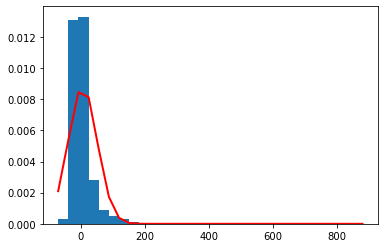

In [11]:
import numpy as np
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(flights['arr_delay'], 30, density=True)
plt.plot(bins, 1/(delay_std * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - delay_mean)**2 / (2 * delay_std**2) ),
         linewidth=2, color='r')
plt.show()

##### Scaling here is not so important! (per mentor/Ighodaro) 

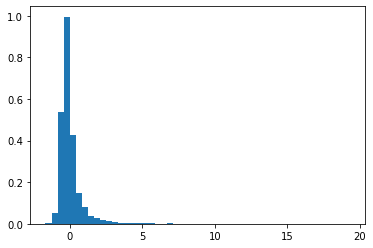

In [65]:

import numpy as np
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(delay_s, 50, density=True)
plt.plot(bins, 1/(delay_s.std() * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - delay_s.mean())**2 / (2 * delay_s.std()**2) ),
         linewidth=0.5, color='r')
plt.show()

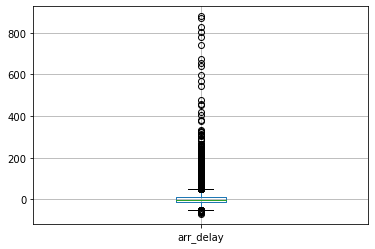

In [70]:
boxplot = flights.boxplot(column=['arr_delay'])  

In [73]:
flights['arr_delay'].describe()

count    9881.000000
mean        6.630503
std        45.180526
min       -70.000000
25%       -13.000000
50%        -3.000000
75%        12.000000
max       879.000000
Name: arr_delay, dtype: float64

In [38]:
# Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
delay = flights['arr_delay'].array
delay_m = scaler.fit_transform(delay.reshape(-1,1))

In [44]:
delay_m.reshape(1,-1)

array([[0.0516333 , 0.06427819, 0.02950474, ..., 0.06217071, 0.06743941,
        0.07376185]])

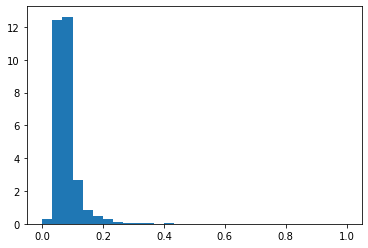

In [62]:

import numpy as np
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(delay_m, 30, density=True)
plt.plot(bins, 1/(delay_m.std() * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - delay_m.mean())**2 / (2 * delay_m.std()**2) ),
         linewidth=0.5, color='r')
plt.show()


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [82]:
flights['Month'] = pd.to_datetime(flights['fl_date']).dt.month

In [87]:
set(flights['Month'])

{1, 9}

In [89]:
flights.groupby('Month').mean()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
Month,,,,,,,,,,,,,,,,,,,,,
1,2392.184556,2392.184556,12828.662985,12810.146624,1359.375261,1371.430166,12.169791,16.522074,1392.705089,1496.162644,...,754.988016,20.134703,2.831963,11.331050,0.110046,23.126027,1341.888889,25.044444,25.044444,NaN
9,949.099010,949.099010,12707.863861,12699.099010,1372.702970,1337.574257,4.673267,17.334158,1348.571782,1410.821782,...,1448.012376,21.947368,0.000000,9.280702,0.000000,18.263158,1235.000000,27.000000,27.000000,NaN


#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?